In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import prophet

In [10]:
idata = pd.read_csv(r"/content/FIR_Details_Data.csv")

<ipython-input-10-28ffdf1cb272>:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  idata = pd.read_csv(r"/content/FIR_Details_Data.csv")


In [11]:
idata.head()

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,VICTIM COUNT,Accused Count,Arrested Male,Arrested Female,Arrested Count\tNo.,Accused_ChargeSheeted Count,Conviction Count,FIR_ID,Unit_ID,Crime_No
0,Bagalkot,Amengad PS,0001/2016,1.0,2016.0,1.0,2015-12-27 12:00:00.000,2015-12-27 12:05:00.000,2016-01-05 11:00:00.000,05/01/2016,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.016000e+09,1245.0,1.047012e+16
1,Bagalkot,Amengad PS,0002/2016,1.0,2016.0,1.0,2016-01-12 17:30:00.000,2016-01-12 17:35:00.000,2016-01-12 19:00:00.000,12/01/2016,...,0.0,5.0,5.0,0.0,5.0,5.0,2.0,2.016000e+09,1245.0,1.047012e+16
2,Bagalkot,Amengad PS,0003/2016,1.0,2016.0,1.0,2016-01-12 17:45:00.000,2016-01-12 17:50:00.000,2016-01-12 19:30:00.000,12/01/2016,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.016000e+09,1245.0,1.047012e+16
3,Bagalkot,Amengad PS,0004/2016,1.0,2016.0,1.0,2016-01-14 21:30:00.000,2016-01-14 21:35:00.000,2016-01-15 14:00:00.000,15/01/2016,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.016000e+09,1245.0,1.047012e+16
4,Bagalkot,Amengad PS,0005/2016,1.0,2016.0,1.0,2016-01-18 15:00:00.000,2016-01-18 15:05:00.000,2016-01-18 19:30:00.000,18/01/2016,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.016000e+09,1245.0,1.047012e+16


In [12]:
idata.tail()

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,VICTIM COUNT,Accused Count,Arrested Male,Arrested Female,Arrested Count\tNo.,Accused_ChargeSheeted Count,Conviction Count,FIR_ID,Unit_ID,Crime_No
91364,Belagavi Dist,Chikkodi Town Traffic PS,0071/2018,1.0,2018.0,10.0,2018-10-14 10:30:00.000,2018-10-14 10:31:00.000,2018-10-15 10:30:00.000,15/10/2018,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.018000e+09,2133.0,1.044421e+16
91365,Belagavi Dist,Chikkodi Town Traffic PS,0072/2018,1.0,2018.0,10.0,2018-10-21 16:45:00.000,2018-10-21 16:46:00.000,2018-10-21 18:30:00.000,21/10/2018,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.018000e+09,2133.0,1.044421e+16
91366,Belagavi Dist,Chikkodi Town Traffic PS,0073/2018,1.0,2018.0,10.0,2018-10-25 09:44:00.000,2018-10-25 09:45:00.000,2018-10-26 09:00:00.000,26/10/2018,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.018000e+09,2133.0,1.044421e+16
91367,Belagavi Dist,Chikkodi Town Traffic PS,0074/2018,1.0,2018.0,10.0,2018-10-24 15:00:00.000,2018-10-24 15:01:00.000,2018-10-26 17:00:00.000,26/10/2018,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.018000e+09,2133.0,1.044421e+16
91368,Belagavi Dist,Chikkodi Town Traff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
idata.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'IOAssigned_Date', 'Internal_IO', 'Place of Offence',
       'Distance from PS', 'Beat_Name', 'Village_Area_Name', 'Male', 'Female',
       'Boy', 'Girl', 'Age 0', 'VICTIM COUNT', 'Accused Count',
       'Arrested Male', 'Arrested Female', 'Arrested Count\tNo.',
       'Accused_ChargeSheeted Count', 'Conviction Count', 'FIR_ID', 'Unit_ID',
       'Crime_No'],
      dtype='object')

In [15]:
idata.shape

(91369, 41)

In [17]:
idata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91369 entries, 0 to 91368
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   District_Name                91369 non-null  object 
 1   UnitName                     91369 non-null  object 
 2   FIRNo                        91368 non-null  object 
 3   RI                           91368 non-null  float64
 4   Year                         91368 non-null  float64
 5   Month                        91368 non-null  float64
 6   Offence_From_Date            91368 non-null  object 
 7   Offence_To_Date              91368 non-null  object 
 8   FIR_Reg_DateTime             91368 non-null  object 
 9   FIR_Date                     91368 non-null  object 
 10  FIR Type                     91368 non-null  object 
 11  FIR_Stage                    91368 non-null  object 
 12  Complaint_Mode               90634 non-null  object 
 13  CrimeGroup_Name 

In [18]:
idata.isnull().sum()

District_Name                      0
UnitName                           0
FIRNo                              1
RI                                 1
Year                               1
Month                              1
Offence_From_Date                  1
Offence_To_Date                    1
FIR_Reg_DateTime                   1
FIR_Date                           1
FIR Type                           1
FIR_Stage                          1
Complaint_Mode                   735
CrimeGroup_Name                    1
CrimeHead_Name                     1
Latitude                           1
Longitude                          1
ActSection                         2
IOName                             3
KGID                               3
IOAssigned_Date                91368
Internal_IO                        1
Place of Offence                   1
Distance from PS                   6
Beat_Name                          1
Village_Area_Name                  1
Male                               1
F

In [19]:
idata.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'IOAssigned_Date', 'Internal_IO', 'Place of Offence',
       'Distance from PS', 'Beat_Name', 'Village_Area_Name', 'Male', 'Female',
       'Boy', 'Girl', 'Age 0', 'VICTIM COUNT', 'Accused Count',
       'Arrested Male', 'Arrested Female', 'Arrested Count\tNo.',
       'Accused_ChargeSheeted Count', 'Conviction Count', 'FIR_ID', 'Unit_ID',
       'Crime_No'],
      dtype='object')

In [20]:
df = idata[['District_Name','FIR_Reg_DateTime']]

In [21]:
df.head()

,District_Name,FIR_Reg_DateTime
0,Bagalkot,2016-01-05 11:00:00.000
1,Bagalkot,2016-01-12 19:00:00.000
2,Bagalkot,2016-01-12 19:30:00.000
3,Bagalkot,2016-01-15 14:00:00.000
4,Bagalkot,2016-01-18 19:30:00.000


In [22]:
df.tail()

,District_Name,FIR_Reg_DateTime
91364,Belagavi Dist,2018-10-15 10:30:00.000
91365,Belagavi Dist,2018-10-21 18:30:00.000
91366,Belagavi Dist,2018-10-26 09:00:00.000
91367,Belagavi Dist,2018-10-26 17:00:00.000
91368,Belagavi Dist,NaN


In [23]:
df.isnull().sum()

District_Name       0
FIR_Reg_DateTime    1
dtype: int64

In [24]:
df = df.dropna()

In [25]:
df.isnull().sum()

District_Name       0
FIR_Reg_DateTime    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91368 entries, 0 to 91367
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   District_Name     91368 non-null  object
 1   FIR_Reg_DateTime  91368 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


In [29]:
df.FIR_Reg_DateTime = pd.to_datetime(df.FIR_Reg_DateTime)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91368 entries, 0 to 91367
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   District_Name     91368 non-null  object        
 1   FIR_Reg_DateTime  91368 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 2.1+ MB


In [31]:
df.head()

,District_Name,FIR_Reg_DateTime
0,Bagalkot,2016-01-05 11:00:00
1,Bagalkot,2016-01-12 19:00:00
2,Bagalkot,2016-01-12 19:30:00
3,Bagalkot,2016-01-15 14:00:00
4,Bagalkot,2016-01-18 19:30:00


In [32]:
df.columns

Index(['District_Name', 'FIR_Reg_DateTime'], dtype='object')

In [33]:
df.index = pd.DatetimeIndex(df.FIR_Reg_DateTime)

In [34]:
df.head()

,District_Name,FIR_Reg_DateTime
FIR_Reg_DateTime,,
2016-01-05 11:00:00,Bagalkot,2016-01-05 11:00:00
2016-01-12 19:00:00,Bagalkot,2016-01-12 19:00:00
2016-01-12 19:30:00,Bagalkot,2016-01-12 19:30:00
2016-01-15 14:00:00,Bagalkot,2016-01-15 14:00:00
2016-01-18 19:30:00,Bagalkot,2016-01-18 19:30:00


Text(0, 0.5, 'Number of Crimes')

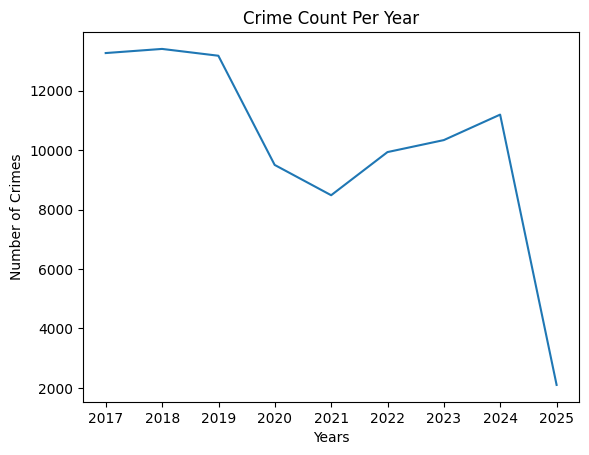

In [35]:
plt.plot(df.resample('Y').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

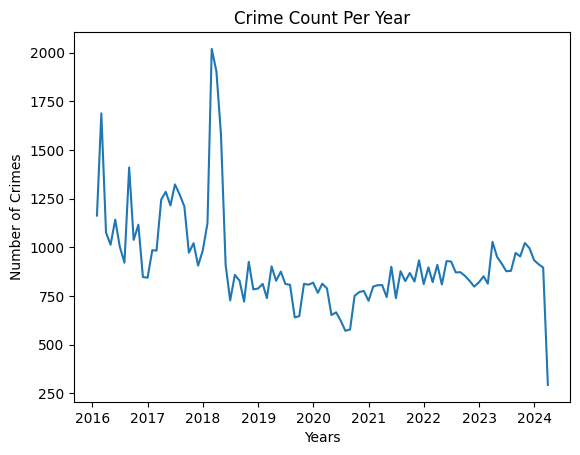

In [36]:
plt.plot(df.resample('M').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

In [37]:
df_prophet = pd.DataFrame(df.resample('M').size().reset_index())

In [38]:
df_prophet.columns =['Date','Crime Count']

In [39]:
df_prophet

,Date,Crime Count
0,2016-01-31,1163
1,2016-02-29,1688
2,2016-03-31,1076
3,2016-04-30,1013
4,2016-05-31,1142
...,...,...
94,2023-11-30,996
95,2023-12-31,934
96,2024-01-31,912
97,2024-02-29,896


In [40]:
df_prophet=df_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [41]:
df_prophet

,ds,y
0,2016-01-31,1163
1,2016-02-29,1688
2,2016-03-31,1076
3,2016-04-30,1013
4,2016-05-31,1142
...,...,...
94,2023-11-30,996
95,2023-12-31,934
96,2024-01-31,912
97,2024-02-29,896


In [46]:
!pip install Prophet

In [54]:
from prophet import Prophet

In [55]:
m = Prophet()
m.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjn1hltmy/ydepocgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjn1hltmy/k2_cu6d8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9347', 'data', 'file=/tmp/tmpjn1hltmy/ydepocgr.json', 'init=/tmp/tmpjn1hltmy/k2_cu6d8.json', 'output', 'file=/tmp/tmpjn1hltmy/prophet_modelggfctjm3/prophet_model-20240413111146.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:11:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [56]:
pred=m.make_future_dataframe(periods=24,freq='M')
forcast = m.predict(pred)

In [57]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-31,1176.578307,878.373296,1359.376823,1176.578307,1176.578307,-58.596728,-58.596728,-58.596728,-58.596728,-58.596728,-58.596728,0.0,0.0,0.0,1117.981579
1,2016-02-29,1170.139837,1172.786880,1670.591766,1170.139837,1170.139837,249.211734,249.211734,249.211734,249.211734,249.211734,249.211734,0.0,0.0,0.0,1419.351571
2,2016-03-31,1163.257335,867.258954,1358.846872,1163.257335,1163.257335,-57.185738,-57.185738,-57.185738,-57.185738,-57.185738,-57.185738,0.0,0.0,0.0,1106.071597
3,2016-04-30,1156.596849,935.405140,1413.648549,1156.596849,1156.596849,23.398564,23.398564,23.398564,23.398564,23.398564,23.398564,0.0,0.0,0.0,1179.995413
4,2016-05-31,1149.714347,957.558249,1449.566962,1149.714347,1149.714347,50.498044,50.498044,50.498044,50.498044,50.498044,50.498044,0.0,0.0,0.0,1200.212391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2025-11-30,815.067579,490.737396,983.358932,804.359972,826.295445,-70.708409,-70.708409,-70.708409,-70.708409,-70.708409,-70.708409,0.0,0.0,0.0,744.359170
119,2025-12-31,814.711258,492.651100,973.425530,803.045393,826.922704,-77.657666,-77.657666,-77.657666,-77.657666,-77.657666,-77.657666,0.0,0.0,0.0,737.053593
120,2026-01-31,814.354937,585.936275,1082.175303,801.684531,827.835073,17.177515,17.177515,17.177515,17.177515,17.177515,17.177515,0.0,0.0,0.0,831.532452
121,2026-02-28,814.033098,652.006285,1143.267528,800.437280,828.401116,78.570431,78.570431,78.570431,78.570431,78.570431,78.570431,0.0,0.0,0.0,892.603529


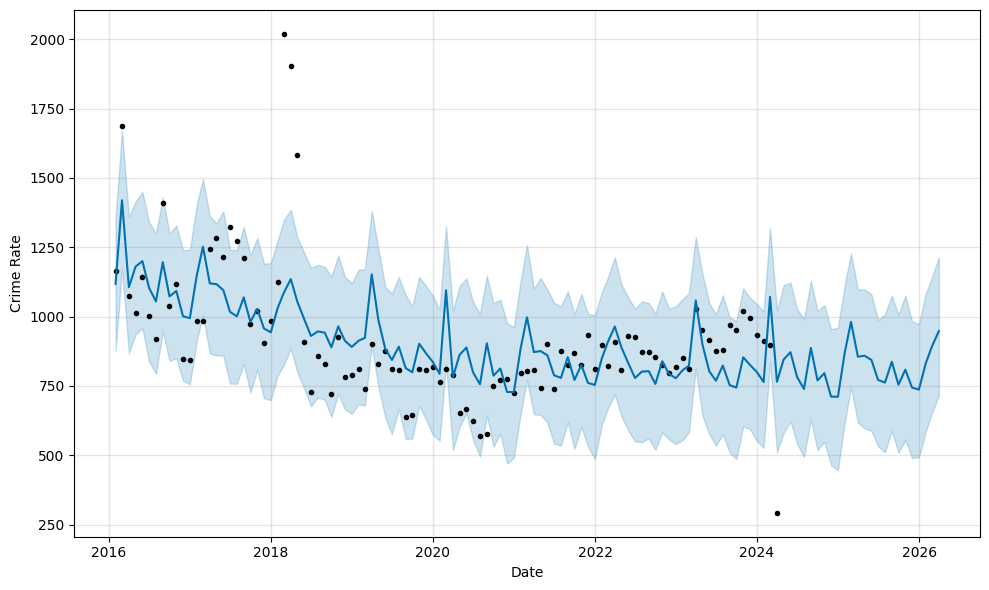

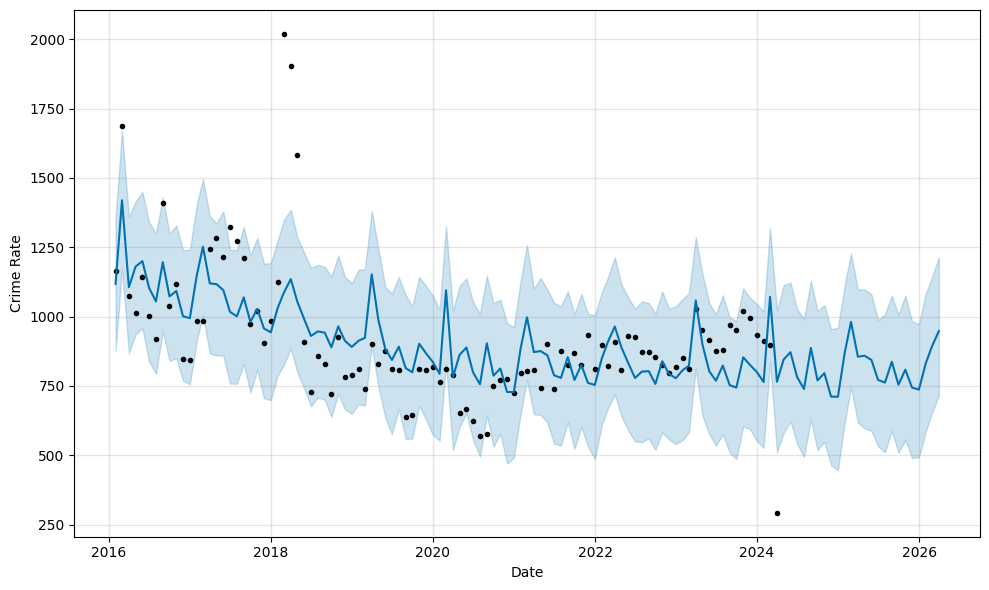

In [58]:
m.plot(forcast,xlabel="Date",ylabel="Crime Rate")